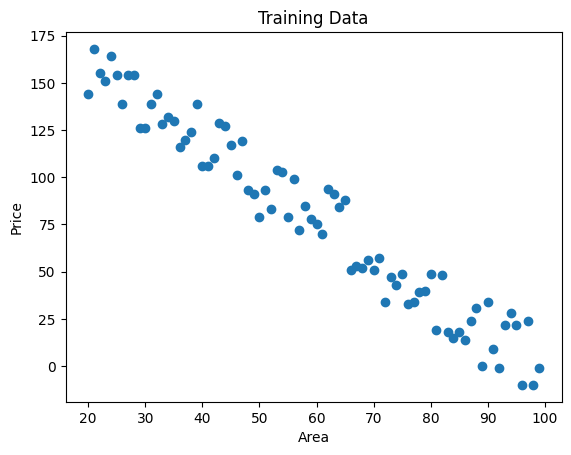

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time


num_data_points = 100

swing = 0.2 * num_data_points


def generateData(num_data_points):
    areas = [i for i in reversed(range(num_data_points))]

    prices = []
    for i in range(num_data_points):
      x = random.randint(-1 * swing, swing)
      y = 2 * i + x
      prices.append(y)

    cut = len(areas) - 20
    x_train = areas[:cut]
    x_val = areas[cut:]

    y_train = prices[:cut]
    y_val = prices[cut:]

    plt.scatter(x_train, y_train)
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Training Data')
    plt.show()
    return x_train, x_val, y_train, y_val

x_train, x_val, y_train, y_val = generateData(num_data_points)

x_train = np.array(x_train)
x_val = np.array(x_val)
y_train = np.array(y_train)
y_val = np.array(y_val)


In [ ]:
class LinearRegressionSingle:

    def __init__(self, learning_rate=0.00012, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weight = None
        self.bias = None

    def train_naive(self, x_train, y_train, breaking_mechanism=True):
        self.weight = 0
        self.bias = 0
        m = len(x_train)
        counter = 0
        prev_cost = -1
        for iter in range(self.num_iterations):
            dw = 0
            db = 0
            cost = 0
            for i in range(m):
                predicted_price = self.weight * x_train[i] + self.bias
                error = predicted_price - y_train[i]
                dw += 2 * error * x_train[i]
                db += 2 * error
                cost += error ** 2
            cost /= m
            dw /= m
            db /= m
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            # Algo ends here, Other stuff starts
            if breaking_mechanism:
                if abs(prev_cost - cost) < cost * 0.00001:
                    counter += 1
                if counter == 1000:
                    print('Terminated early after', iter - 1, 'iterations')
                    return
                prev_cost = cost
            if iter % 10000 == 0:
                print('iteration', iter, '/', self.num_iterations, end='')
                print(' cost = ', cost)

    def train(self, x_train, y_train, breaking_mechanism=True):
        self.weight = 0
        self.bias = 0
        m = len(x_train)
        counter = 0
        prev_cost = -1
        for iter in range(self.num_iterations):
            predicted_prices = self.weight * x_train + self.bias
            errors = predicted_prices - y_train
            dw = (2 / m) * np.dot(errors, x_train)
            db = 2 * np.mean(errors)
            cost = np.mean(errors**2)
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            # Algo ends here, Other stuff starts
            if breaking_mechanism:
                if abs(prev_cost - cost) < cost * 0.00001:
                    counter += 1
                if counter == 1000:
                    print('Terminated early after', iter - 1, 'iterations')
                    return
                prev_cost = cost
            if iter % 10000 == 0:
                print('iteration', iter, '/', self.num_iterations, end='')
                print(' cost = ', cost)

    def predict(self, x):
        return self.weight * x + self.bias

    def plotLine(self, x_train, y_train):
        x = np.linspace(0, len(x_train), 100)
        y = self.weight * x + self.bias
        plt.plot(x, y)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Line Plot')
        plt.show()

    def printStats(self, x_val, y_val, indi=False):
        error = 0
        accurate = 0
        for i in range(len(x_val)):
            prediction = round(self.predict(x_val[i]), 2)
            target = y_val[i]
            ind_error = abs(target - prediction)
            if ind_error <= swing:
                accurate += 1
            error += abs(ind_error)
            if indi:
                print('target :', target, '\t', 'prediction :', prediction,
                      '\t', 'error :', round(ind_error, 2))
        print('total error :', round(error, 2))
        accuracy = round(accurate / len(x_val), 2)
        print('accuracy within margin :', accuracy * 100, '%')

iteration 0 / 100000 cost =  8528.0625
iteration 10000 / 100000 cost =  2823.9194069800765
iteration 20000 / 100000 cost =  1509.5475784983435
iteration 30000 / 100000 cost =  837.047910160627
iteration 40000 / 100000 cost =  492.96277830202905
iteration 50000 / 100000 cost =  316.9112744272785
iteration 60000 / 100000 cost =  226.83434535699348
iteration 70000 / 100000 cost =  180.74639397825396
iteration 80000 / 100000 cost =  157.16544728954756
iteration 90000 / 100000 cost =  145.10023219317225

-1.9483228730492699 193.4427590112815



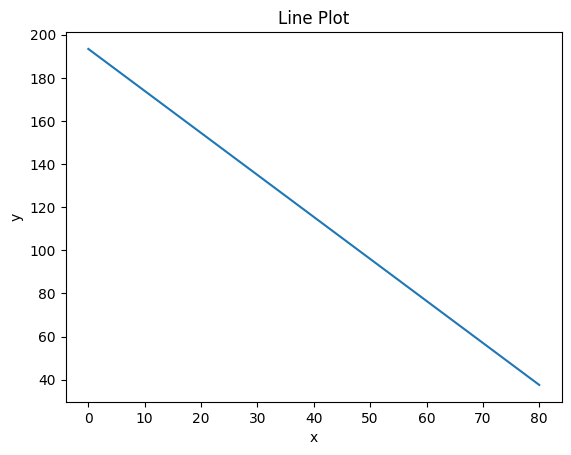


target : 176 	 prediction : 156.42 	 error : 19.58
target : 148 	 prediction : 158.37 	 error : 10.37
target : 154 	 prediction : 160.32 	 error : 6.32
target : 164 	 prediction : 162.27 	 error : 1.73
target : 174 	 prediction : 164.22 	 error : 9.78
target : 172 	 prediction : 166.17 	 error : 5.83
target : 161 	 prediction : 168.11 	 error : 7.11
target : 169 	 prediction : 170.06 	 error : 1.06
target : 196 	 prediction : 172.01 	 error : 23.99
target : 169 	 prediction : 173.96 	 error : 4.96
target : 174 	 prediction : 175.91 	 error : 1.91
target : 178 	 prediction : 177.86 	 error : 0.14
target : 175 	 prediction : 179.8 	 error : 4.8
target : 205 	 prediction : 181.75 	 error : 23.25
target : 182 	 prediction : 183.7 	 error : 1.7
target : 170 	 prediction : 185.65 	 error : 15.65
target : 183 	 prediction : 187.6 	 error : 4.6
target : 182 	 prediction : 189.55 	 error : 7.55
target : 179 	 prediction : 191.49 	 error : 12.49
target : 200 	 prediction : 193.44 	 error : 6.56

In [ ]:
regression = LinearRegressionSingle(learning_rate=0.000128, num_iterations=100000)
regression.train(x_train, y_train, False)

print()
print(regression.weight, regression.bias)
print()
regression.plotLine(x_train, y_train)
print()
regression.printStats(x_val, y_val, indi=True)